In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
df=pd.read_csv('wine.data',header=-1)
df.shape

(178, 14)

In [46]:
df.columns=['class','Alcohol','Malic acid','Ash','Alk Ash','Mg','TPh','Foid','NFoid','Pro','Intensity','Hue','DC','Proline']

In [47]:
df.head()

,class,Alcohol,Malic acid,Ash,Alk Ash,Mg,TPh,Foid,NFoid,Pro,Intensity,Hue,DC,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [48]:
np.unique(df['class'])

array([1, 2, 3], dtype=int64)

In [49]:
X=df.drop(['class'],axis=1)
y=df['class']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

### PCA with given fixed number of components (=2)

In [52]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [53]:
pca.explained_variance_ratio_

array([ 0.35900066,  0.18691934])

In [54]:
np.round(pca.explained_variance_ratio_,3)

array([ 0.359,  0.187])

In [55]:
pd.DataFrame(np.round(pca.components_,3),columns=X.columns).T

,0,1
Alcohol,0.128,-0.493
Malic acid,-0.256,-0.190
Ash,-0.022,-0.317
Alk Ash,-0.244,0.035
Mg,0.148,-0.262
TPh,0.385,-0.096
Foid,0.420,-0.015
NFoid,-0.299,-0.076
Pro,0.308,-0.074
Intensity,-0.119,-0.534


### PCA with unknown number of Components

In [56]:
pca=PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [57]:
np.round(pca.explained_variance_ratio_,3)

array([ 0.359,  0.187,  0.116,  0.074,  0.067,  0.049,  0.042,  0.027,
        0.023,  0.019,  0.017,  0.013,  0.008])

In [58]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.35900066,  0.54592   ,  0.66198557,  0.73570273,  0.80224132,
        0.85078714,  0.89273756,  0.91957678,  0.94305138,  0.96194872,
        0.97910815,  0.99173743,  1.        ])

Text(0,0.5,'cumulative explained variance')

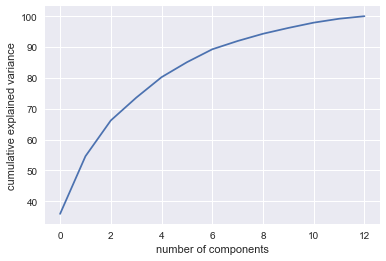

In [59]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100,)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
